<a href="https://colab.research.google.com/github/Kiedroo12/Finanse/blob/main/System_rekomendacji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings = pd.read_csv('/content/drive/MyDrive/UM w finansach/Case2/Dane/u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])
movies = pd.read_csv('/content/drive/MyDrive/UM w finansach/Case2/Dane/u.item', sep='|', encoding='latin-1',
                     names=['movie_id','title','release_date','video_release_date','imdb_url'] + [f'genre_{i}' for i in range(19)])


In [4]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   genre_0             1682 non-null   int64  
 6   genre_1             1682 non-null   int64  
 7   genre_2             1682 non-null   int64  
 8   genre_3             1682 non-null   int64  
 9   genre_4             1682 non-null   int64  
 10  genre_5             1682 non-null   int64  
 11  genre_6             1682 non-null   int64  
 12  genre_7             1682 non-null   int64  
 13  genre_8             1682 non-null   int64  
 14  genre_9             1682 non-null   int64  
 15  genre_10            1682 non-null   int64  
 16  genre_

In [8]:
n_ratings = len(ratings)
n_movies = len(movies['movie_id'].unique())
n_users = len(ratings['user_id'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movie_id's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100000
Number of unique movie_id's: 1682
Number of unique users: 943
Average number of ratings per user: 106.04
Average number of ratings per movie: 59.45


/tmp/ipython-input-2038653828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="viridis")


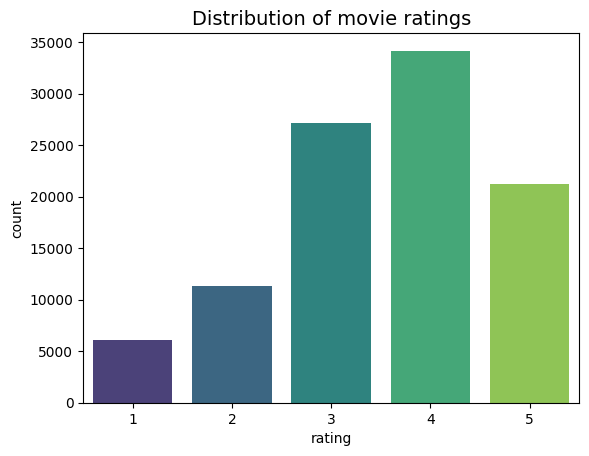

In [9]:
sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [10]:
merged = ratings.merge(movies, left_on='item_id', right_on='movie_id')
print("Połączona tabela:", merged.shape)

movie_stats = (
    merged
    .groupby(['movie_id', 'title'])
    .agg(
        avg_rating=('rating', 'mean'),
        num_ratings=('rating', 'count')
    )
    .sort_values('avg_rating', ascending=False)
)

movie_stats_filtered = movie_stats[movie_stats['num_ratings'] >= 30]

top10 = movie_stats_filtered.head(10)
print("\nTOP 10 najwyżej ocenianych filmów (min 30 ocen):")
display(top10)


Połączona tabela: (100000, 28)

TOP 10 najwyżej ocenianych filmów (min 30 ocen):


,,avg_rating,num_ratings
movie_id,title,,
408,"Close Shave, A (1995)",4.491071,112
318,Schindler's List (1993),4.466443,298
169,"Wrong Trousers, The (1993)",4.466102,118
483,Casablanca (1942),4.456790,243
114,Wallace & Gromit: The Best of Aardman Animation (1996),4.447761,67
64,"Shawshank Redemption, The (1994)",4.445230,283
603,Rear Window (1954),4.387560,209
12,"Usual Suspects, The (1995)",4.385768,267
50,Star Wars (1977),4.358491,583


/tmp/ipython-input-778243229.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ratings_1995['rating'], palette="viridis")


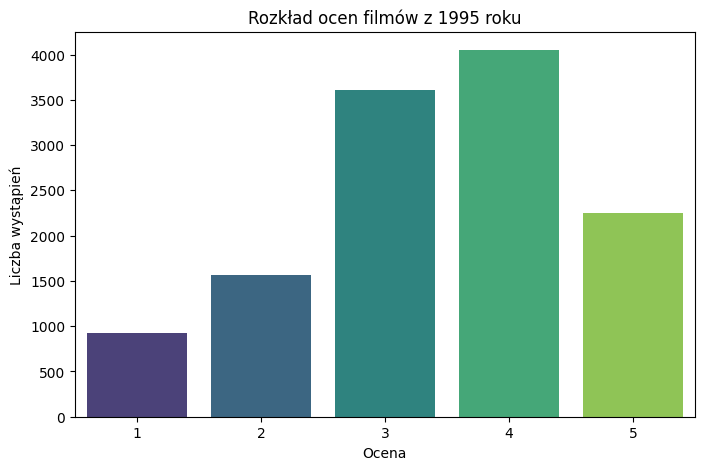

Liczba ocen filmów z 1995 roku: 12389
Liczba filmów z 1995 roku: 294


In [11]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)$')

movies_1995 = movies[movies['year'] == '1995'][['movie_id', 'title']]

ratings_1995 = ratings.merge(movies_1995, left_on='item_id', right_on='movie_id')

plt.figure(figsize=(8,5))
sns.countplot(x=ratings_1995['rating'], palette="viridis")
plt.title('Rozkład ocen filmów z 1995 roku')
plt.xlabel('Ocena')
plt.ylabel('Liczba wystąpień')
plt.show()

print("Liczba ocen filmów z 1995 roku:", len(ratings_1995))
print("Liczba filmów z 1995 roku:", movies_1995.shape[0])

In [12]:
num_children_movies = movies['genre_4'].sum()
print(f"Liczba filmów dla dzieci: {num_children_movies}")

Liczba filmów dla dzieci: 122


In [13]:
action_movies = movies[movies['genre_1'] == 1][['movie_id', 'title']]

ratings_action = ratings.merge(action_movies, left_on='item_id', right_on='movie_id')

avg_action_rating = ratings_action['rating'].mean()
print(f"Średnia ocena wszystkich filmów akcji: {avg_action_rating:.3f}")

top3_action = (
    ratings_action
    .groupby(['movie_id', 'title'])
    .agg(avg_rating=('rating', 'mean'),
         num_ratings=('rating', 'count'))
    .query("num_ratings >= 30")
    .sort_values('avg_rating', ascending=False)
    .head(3)
)

print("\nTop 3 najwyżej oceniane filmy akcji (minimum 30 ocen):")
display(top3_action)

Średnia ocena wszystkich filmów akcji: 3.480

Top 3 najwyżej oceniane filmy akcji (minimum 30 ocen):


,,avg_rating,num_ratings
movie_id,title,,
50,Star Wars (1977),4.358491,583
127,"Godfather, The (1972)",4.283293,413
174,Raiders of the Lost Ark (1981),4.252381,420


In [18]:
num_users = ratings['user_id'].max()
num_items = ratings['item_id'].max()

R = np.zeros((num_users, num_items))

for row in ratings.itertuples():
    R[row.user_id - 1, row.item_id - 1] = row.rating

print("Rozmiar macierzy R:", R.shape)
print("Przykład (pierwsze 5 wierszy):")
R[:5, :10]


Rozmiar macierzy R: (943, 1682)
Przykład (pierwsze 5 wierszy):


array([[5., 3., 4., 3., 3., 5., 4., 1., 5., 3.],
       [4., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 3., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
from scipy.sparse.linalg import svds
import numpy as np

user_means = np.true_divide(R.sum(axis=1), (R != 0).sum(axis=1))
user_means = np.nan_to_num(user_means)

R_demeaned = np.where(R != 0, R - user_means[:, None], 0)

U, sigma, Vt = svds(R_demeaned, k=20)
sigma = np.diag(sigma)

pred_svd = np.dot(np.dot(U, sigma), Vt) + user_means[:, None]

print("SVD gotowe – przykładowe przewidywania:")
pred_svd[:5, :10]


SVD gotowe – przykładowe przewidywania:


array([[4.40105029, 3.5586041 , 3.42455938, 3.53030751, 3.27055585,
        3.73175222, 4.63896883, 3.82986873, 4.63319158, 3.7897698 ],
       [3.55804471, 3.75427217, 3.62997436, 3.72405743, 3.73662374,
        3.74408399, 3.70625725, 3.80477264, 3.7506893 , 3.62999829],
       [2.68049031, 2.78506201, 2.72499598, 2.90313186, 2.80110795,
        2.80413211, 2.67672791, 2.69952822, 2.68055683, 2.78965721],
       [4.48211526, 4.35104436, 4.34853841, 4.27614776, 4.29349713,
        4.33311343, 4.44030185, 4.40564576, 4.38518915, 4.35116319],
       [3.7017177 , 2.95129813, 2.74060594, 2.99894304, 2.76013435,
        2.95452527, 3.80024254, 2.93865475, 2.57132752, 3.0182903 ]])

In [20]:
def recommend_svd(user_id, n=10):
    user_row = pred_svd[user_id - 1]

    rated = R[user_id - 1] > 0

    rec_indices = np.argsort(-user_row)

    rec_indices = [i for i in rec_indices if not rated[i]]

    top_items = rec_indices[:n]
    movie_ids = [i + 1 for i in top_items]

    return movies[movies['movie_id'].isin(movie_ids)][['movie_id', 'title']]


In [21]:
recommend_svd(user_id=1, n=10)
recommend_svd(user_id=50, n=10)
recommend_svd(user_id=123, n=10)

,movie_id,title
174,175,Brazil (1985)
178,179,"Clockwork Orange, A (1971)"
179,180,Apocalypse Now (1979)
199,200,"Shining, The (1980)"
208,209,This Is Spinal Tap (1984)
268,269,"Full Monty, The (1997)"
301,302,L.A. Confidential (1997)
356,357,One Flew Over the Cuckoo's Nest (1975)
653,654,Chinatown (1974)
1078,1079,Joe's Apartment (1996)


In [22]:
user_means = np.true_divide(R.sum(axis=1), (R != 0).sum(axis=1))
user_means = np.nan_to_num(user_means)

In [23]:
from numpy.linalg import norm

def cosine_similarity(u, v):
    mask = (u > 0) & (v > 0)
    if mask.sum() == 0:
        return 0
    u2 = u[mask]
    v2 = v[mask]
    if norm(u2) == 0 or norm(v2) == 0:
        return 0
    return np.dot(u2, v2) / (norm(u2) * norm(v2))

sim = np.zeros((num_users, num_users))

for i in range(num_users):
    for j in range(i+1,num_users):
        s = cosine_similarity(R[i], R[j])
        sim[i,j] = sim[j,i] = s


In [24]:
def predict_knn(user_id, item_id, k=20):
    user_idx = user_id - 1
    item_idx = item_id - 1

    mask = R[:, item_idx] > 0
    if mask.sum() == 0:
        return user_means[user_idx]

    sims = sim[user_idx, mask]
    ratings = R[mask, item_idx]
    means = user_means[mask]

    diffs = ratings - means

    order = np.argsort(-sims)

    sims = sims[order][:k]
    diffs = diffs[order][:k]

    if np.sum(np.abs(sims)) == 0:
        return user_means[user_idx]

    return user_means[user_idx] + np.dot(sims, diffs) / np.sum(np.abs(sims))


In [25]:
def recommend_knn(user_id, n=10):
    user_idx = user_id - 1

    predictions = []
    for item_id in range(1, num_items + 1):
        if R[user_idx, item_id - 1] == 0:
            pred = predict_knn(user_id, item_id)
            predictions.append((item_id, pred))

    predictions.sort(key=lambda x: x[1], reverse=True)
    top = predictions[:n]

    movie_ids = [x[0] for x in top]
    return movies[movies['movie_id'].isin(movie_ids)][['movie_id','title']]


In [26]:
recommend_knn(1, n=10)
recommend_knn(50, n=10)
recommend_knn(123, n=10)

,movie_id,title
813,814,"Great Day in Harlem, A (1994)"
1292,1293,Star Kid (1997)
1397,1398,Anna (1996)
1448,1449,Pather Panchali (1955)
1466,1467,"Saint of Fort Washington, The (1993)"
1499,1500,Santa with Muscles (1996)
1535,1536,Aiqing wansui (1994)
1598,1599,Someone Else's America (1995)
1641,1642,Some Mother's Son (1996)
1652,1653,Entertaining Angels: The Dorothy Day Story (1996)


In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ratings, test_size=0.2, random_state=42)


In [28]:
R_train = np.zeros_like(R)

for row in train.itertuples():
    R_train[row.user_id - 1, row.item_id - 1] = row.rating

In [29]:
from math import sqrt

def rmse(true, pred):
    return sqrt(np.mean((np.array(true) - np.array(pred))**2))


In [30]:
true_ratings = []
pred_ratings_svd = []

for row in test.itertuples():
    true_ratings.append(row.rating)
    pred_ratings_svd.append(pred_svd[row.user_id - 1, row.item_id - 1])

rmse_svd = rmse(true_ratings, pred_ratings_svd)
rmse_svd

0.8472677377882176

In [31]:
pred_ratings_knn = []

for row in test.itertuples():
    pred = predict_knn(row.user_id, row.item_id, k=20)
    pred_ratings_knn.append(pred)

rmse_knn = rmse(true_ratings, pred_ratings_knn)
rmse_knn

0.8339680406069997

In [32]:
def cosine_sim(R):
    norms = np.linalg.norm(R, axis=1, keepdims=True)
    norms[norms == 0] = 1
    R_norm = R / norms
    return R_norm @ R_norm.T

sim_matrix = cosine_sim(R)

def predict_knn(user, item, k):
    sims = sim_matrix[user]
    ratings = R[:, item]

    mask = ratings > 0
    sims = sims[mask]
    ratings = ratings[mask]

    if len(ratings) == 0:
        return user_means[user]

    idx = np.argsort(sims)[-k:]
    sims_k = sims[idx]
    ratings_k = ratings[idx]

    return np.dot(sims_k, ratings_k) / (np.sum(np.abs(sims_k)) + 1e-6)

def predict_knn_means(user, item, k):
    sims = sim_matrix[user]
    ratings = R[:, item]

    mask = ratings > 0
    sims = sims[mask]
    ratings = ratings[mask]

    if len(ratings) == 0:
        return user_means[user]

    mean_adj = ratings - user_means[mask]

    idx = np.argsort(sims)[-k:]
    sims_k = sims[idx]
    mean_adj_k = mean_adj[idx]

    pred = user_means[user] + np.dot(sims_k, mean_adj_k) / (np.sum(np.abs(sims_k)) + 1e-6)
    return pred


In [33]:
from sklearn.model_selection import KFold
from math import sqrt

def rmse(y_true, y_pred):
    return sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_knn = {}
results_knn_means = {}

k_values = range(3, 11)

for k in k_values:
    rmses_knn = []
    rmses_knn_means = []

    for train_idx, test_idx in kf.split(ratings):
        train = ratings.iloc[train_idx]
        test = ratings.iloc[test_idx]

        true = []
        pred1 = []
        pred2 = []

        for row in test.itertuples():
            true.append(row.rating)
            pred1.append(predict_knn(row.user_id - 1, row.item_id - 1, k))
            pred2.append(predict_knn_means(row.user_id - 1, row.item_id - 1, k))

        rmses_knn.append(rmse(true, pred1))
        rmses_knn_means.append(rmse(true, pred2))

    results_knn[k] = np.mean(rmses_knn)
    results_knn_means[k] = np.mean(rmses_knn_means)

print("kNN:", results_knn)
print("kNN with Means:", results_knn_means)


kNN: {3: np.float64(0.5704128336626109), 4: np.float64(0.6443678169880157), 5: np.float64(0.6934756027481092), 6: np.float64(0.7285672209501945), 7: np.float64(0.7549725398659406), 8: np.float64(0.7759979410729415), 9: np.float64(0.7929837816112008), 10: np.float64(0.8069398824357252)}
kNN with Means: {3: np.float64(0.5294241535447428), 4: np.float64(0.5984558437758236), 5: np.float64(0.6439685353533553), 6: np.float64(0.6764799808990484), 7: np.float64(0.7009478561733962), 8: np.float64(0.7205424906353998), 9: np.float64(0.7363526950153961), 10: np.float64(0.7492591975062834)}


In [34]:
best_k_knn = min(results_knn, key=results_knn.get)
best_rmse_knn = results_knn[best_k_knn]

best_k_knn_means = min(results_knn_means, key=results_knn_means.get)
best_rmse_knn_means = results_knn_means[best_k_knn_means]

print("Najlepszy k (kNN):", best_k_knn, " RMSE:", best_rmse_knn)
print("Najlepszy k (kNNwithMeans):", best_k_knn_means, " RMSE:", best_rmse_knn_means)

Najlepszy k (kNN): 3  RMSE: 0.5704128336626109
Najlepszy k (kNNwithMeans): 3  RMSE: 0.5294241535447428


In [46]:
movies[movies['title'].str.contains("NeverEnding Story III", case=False)]


,movie_id,title,release_date,video_release_date,imdb_url,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18,year
547,548,"NeverEnding Story III, The (1994)",02-Feb-1996,NaN,http://us.imdb.com/M/title-exact?NeverEnding%2...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1994


In [47]:
movies[movies['title'].str.contains("Pi", case=False)]

,movie_id,title,release_date,video_release_date,imdb_url,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18,year
65,66,While You Were Sleeping (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?While%20You%2...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
125,126,"Spitfire Grill, The (1996)",06-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Spitfire%20Gr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
162,163,"Return of the Pink Panther, The (1974)",01-Jan-1974,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1974
171,172,"Empire Strikes Back, The (1980)",01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,...,0,0,0,0,1,1,0,1,0,1980
208,209,This Is Spinal Tap (1984),01-Jan-1984,NaN,http://us.imdb.com/M/title-exact?This%20Is%20S...,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1984
213,214,Pink Floyd - The Wall (1982),01-Jan-1982,NaN,http://us.imdb.com/M/title-exact?Pink%20Floyd%...,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1982
252,253,"Pillow Book, The (1995)",13-Jun-1997,NaN,http://us.imdb.com/M/title-exact?Pillow%20Book...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
314,315,Apt Pupil (1998),23-Oct-1998,NaN,http://us.imdb.com/Title?Apt+Pupil+(1998),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1998
327,328,Conspiracy Theory (1997),08-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Conspiracy+Th...,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1997
351,352,Spice World (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1997


In [48]:
film_id = 548
film_index = film_id - 1

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

vec = pred_svd[:, film_index].reshape(1, -1)

sim = cosine_similarity(pred_svd.T, vec).flatten()

similar_indices = sim.argsort()[::-1]


In [50]:
def recommend_similar(movie_id, n=10):
    idx = movie_id - 1
    vec = pred_svd[:, idx].reshape(1, -1)
    sim = cosine_similarity(pred_svd.T, vec).flatten()

    similar = sim.argsort()[::-1]
    similar = similar[similar != idx][:n]

    return movies[movies['movie_id'].isin(similar+1)][['movie_id', 'title']]

recommend_similar(548, n=10)


,movie_id,title
625,626,So Dear to My Heart (1949)
713,714,Carrington (1995)
998,999,Clean Slate (1994)
1061,1062,Four Days in September (1997)
1099,1100,What Happened Was... (1994)
1108,1109,Death and the Maiden (1994)
1199,1200,Kim (1950)
1259,1260,Total Eclipse (1995)
1404,1405,Boy's Life 2 (1997)
1554,1555,"Secret Adventures of Tom Thumb, The (1993)"


In [51]:
movie_query = movies[movies['title'].str.contains("NeverEnding Story III", case=False)]
movie_query

,movie_id,title,release_date,video_release_date,imdb_url,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18,year
547,548,"NeverEnding Story III, The (1994)",02-Feb-1996,NaN,http://us.imdb.com/M/title-exact?NeverEnding%2...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1994


In [52]:
from sklearn.metrics.pairwise import cosine_similarity

genre_cols = [c for c in movies.columns if c.startswith("genre_")]
genre_matrix = movies[genre_cols].values

genre_sim = cosine_similarity(genre_matrix)

In [53]:
popularity = ratings.groupby("item_id")['rating'].count()
popularity = popularity / popularity.max()   # skalowanie 0–1

In [55]:
import numpy as np
import pandas as pd

def recommend_hybrid(movie_id, alpha=0.6, beta=0.3, gamma=0.1, n=10):
    """
    alpha – waga podobieństwa gatunków
    beta  – waga SVD (uśrednione predykcje)
    gamma – waga popularności filmów
    """

    idx = movie_id - 1

    sim_scores = genre_sim[idx]

    svd_scores = pred_svd.mean(axis=0)

    pop_scores = popularity.reindex(movies.movie_id).fillna(0).values

    hybrid_score = alpha * sim_scores + beta * svd_scores + gamma * pop_scores

    top_idx = np.argsort(hybrid_score)[::-1]
    top_idx = [i for i in top_idx if (i+1) != movie_id][:n]

    return movies.iloc[top_idx][['movie_id', 'title']]

In [56]:
recommend_hybrid(movie_id=548, n=10)

,movie_id,title
1291,1292,"Simple Wish, A (1997)"
422,423,E.T. the Extra-Terrestrial (1982)
307,308,FairyTale: A True Story (1997)
1132,1133,Escape to Witch Mountain (1975)
831,832,Bogus (1996)
1335,1336,Kazaam (1996)
950,951,"Indian in the Cupboard, The (1995)"
891,892,Flubber (1997)
140,141,"20,000 Leagues Under the Sea (1954)"
1614,1615,Warriors of Virtue (1997)
